In [3]:
cd ..

/home/amiyaguchi/cs224w/wikipedia-retention


# Role distribution on quarterly, reduced-edge user network

Truncated SVD is a good non-linear technique for preserving similarity in a matrix. We also soft-cluster recursive features through nonnegative matrix factorization (NMF). These clusters correspond to the k-means of the dataset. We use tSNE to map nodes to their closest neighbors.

In [4]:
import pandas as pd

base = "data/processed/roles/"

# recursively mined aggregate to generate embedding and dataset (sorted and binned by frequency)
rolx_vec = pd.read_csv(base + "v.txt", header=None, sep=" ")
rolx_mapping = pd.read_csv(base + "mappings.txt", header=None, skiprows=1, sep=" ")
df = pd.concat([rolx_mapping, rolx_vec], axis=1).iloc[:, 1:]

In [5]:
df.head()

,1,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,374125257,599.0,18908.0,747649.0,784866.0,1310.293823,50214576.0,83830.679688,385936576.0,644301.437500,...,672486.687500,5.160224e+07,4.708649e+11,7.316149e+08,672446.687500,5.159941e+07,4.708380e+11,7.315918e+08,672418.562500,5.159746e+07
1,375134183,3.0,5.0,1768.0,1775.0,591.666687,92193.0,30731.000000,1978541.0,659513.687500,...,672591.312500,5.160818e+07,4.707801e+11,7.315356e+08,672487.062500,5.160106e+07,4.708555e+11,7.315256e+08,672454.625000,5.159950e+07
2,18452631,337.0,2340.0,23174.0,27517.0,81.652817,139026.0,412.540070,2378401.0,7057.569824,...,7238.392578,4.377599e+04,6.054702e+07,1.030244e+06,7205.136719,4.356580e+04,6.054457e+07,1.024279e+06,7195.129883,4.350166e+04
3,183444741,17.0,36.0,4866.0,4921.0,289.470581,29062.0,1709.529419,167146.0,9832.117188,...,7132.670898,4.303154e+04,6.136559e+07,9.967964e+05,7245.316406,4.372641e+04,5.912551e+07,1.033141e+06,7147.193848,4.315531e+04
4,17668890,687.0,31364.0,1047249.0,1109290.0,1614.687012,80997112.0,117899.726562,598326784.0,870926.875000,...,820220.437500,6.924318e+07,7.052240e+11,9.885325e+08,820182.250000,6.924093e+07,7.052418e+11,9.885728e+08,820164.875000,6.923970e+07


In [7]:
from sklearn.decomposition import NMF


nmf = NMF(n_components=8,
          solver="mu", 
          beta_loss="kullback-leibler",
          tol=1e-6,
          max_iter=100,
          verbose=True)

G = nmf.fit_transform(df.iloc[:, 1:])

Epoch 10 reached after 129.884 seconds, error: 525387749.242854
Epoch 20 reached after 213.089 seconds, error: 514078751.818475
Epoch 30 reached after 300.773 seconds, error: 509946059.339821
Epoch 40 reached after 384.328 seconds, error: 506863410.582194
Epoch 50 reached after 475.704 seconds, error: 504822483.114429
Epoch 60 reached after 566.999 seconds, error: 503524542.149787
Epoch 70 reached after 651.587 seconds, error: 502645079.236450
Epoch 80 reached after 738.163 seconds, error: 502017278.329507
Epoch 90 reached after 822.837 seconds, error: 501558414.561006
Epoch 100 reached after 907.354 seconds, error: 501221692.692909


/home/amiyaguchi/cs224w/wikipedia-retention/venv3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 100 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [8]:
import numpy as np
# checkpoint
np.savetxt("data/interim/nmf-G.txt", G)

In [9]:
G = np.loadtxt("data/interim/nmf-G.txt")

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
X = pca.fit_transform(df.iloc[:, 1:].values)

In [11]:
def to_row(x):
    s = str(x)
    return int(s[0]), int('200'+s[1]), int(s[2:])

rolx_labels = pd.DataFrame(list(map(to_row, rolx_mapping[1])))
rolx_labels.columns = ['quarter', 'year', 'user_id']
rolx_labels.head()

,quarter,year,user_id
0,3,2007,4125257
1,3,2007,5134183
2,1,2008,452631
3,1,2008,3444741
4,1,2007,668890


In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pca = PCA(n_components=2, svd_solver='full')
scaled = StandardScaler().fit_transform(df.iloc[:, 1:].values)
X = pca.fit_transform(scaled)

In [13]:
import numpy as np
roles = np.argmax(G, axis=1)

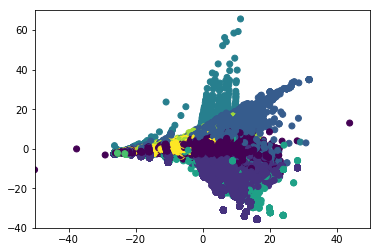

In [28]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=roles)
plt.xlim(-50, 50)
plt.ylim(-40, 70)
plt.show()

In [15]:
! ls

data	      LICENSE	 README.md   requirements.txt  tox.ini
dependencies  models	 references  setup.py	       venv
derby.log     notebooks  reports     src	       venv3


In [16]:
! pip install umap-learn

    100% |████████████████████████████████| 40kB 731kB/s ta 0:00:01
    100% |████████████████████████████████| 3.2MB 4.1MB/s ta 0:00:011    71% |███████████████████████         | 2.3MB 2.6MB/s eta 0:00:01
    100% |████████████████████████████████| 16.1MB 1.7MB/s ta 0:00:011
  Running setup.py bdist_wheel for umap-learn ... done
  Stored in directory: /home/amiyaguchi/.cache/pip/wheels/be/a5/95/6cb125db66c98d790fa627977d6cacd16c59a6bfeeab957aa3
Successfully built umap-learn


In [26]:
# from sklearn.manifold import TSNE
from time import time
# from MulticoreTSNE import MulticoreTSNE as TSNE
import umap

idx = np.random.choice(scaled.shape[0], int(1e5))
sampled = scaled[idx]

start = time()
X_emb = umap.UMAP(n_components=2).fit_transform(sampled)
print(f"embedding plot took {time() - start}s")

/home/amiyaguchi/cs224w/wikipedia-retention/venv3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 13 separate connected components using meta-embedding (experimental)
  n_components


embedding plot took 278.2952103614807s


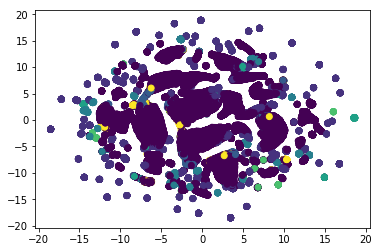

In [27]:
plt.scatter(X_emb[:,0], X_emb[:, 1], c=roles[idx])
plt.show()

In [29]:
# TODO: rejection or gibbs sampling